In [21]:
import numpy as np
import random
import time

In [22]:
import matplotlib
import IPython

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)

import astropy.units as u

In [24]:
print(np.__version__) #Should be 1.20.3

1.20.3


In [25]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd())+"/analysis_scripts")     #!!! Change path to location of differential_counts.py and ALP_sim.py
from ALP_quick_sim import ALP_sim

In [26]:
def full_params(
                params: list[float]
                ) -> list[float]:
        
        ''' 
        The default parameter expansion function. The expansion function allows to flexibly choose 
        which model parameters are considered as input to the model method (e.g. self.model,
        self.model_log, etc. Toy models are not affected). For example, when this present default 
        function is used, the only inputs to the model methods are the values of mass and coupling, 
        i.e. a 2D list. If you wanted to make, for example, the rms of the B-field the third input 
        parameter, first copy self.full_params_default to a new function new_func(params), change 
        the value corresponding to the B-field RMS value to "params[2]", and then set 
        self.full_param_vec (see init method) to new_func. See also method full_params_spectral for
        a different example. The model methods will then expect a 3D list instead. When running the 
        model method, self.full_param_vec(params) is called, effectively expanding the model 
        parameters to the full list of 18.  
        
        
        Input:
            -  params:              Input parameters to model methods. 

        Output:
            -  full_par             Full list of all 18 model parameter values. 


        '''
        
        full_par = [
                    params[0],          # mass m in neV
                    params[1],          # coupling constant g in 10^(-11) /GeV
                    
                    5.75 * 1e-9,        # Amplitude of power law, in "TeV-1 cm-2 s-1" # 10e-6 
                    2.36859,            # Spectral index of the PWL
                    153.86,             # Reference energy (?) E0, In GeV
                    819.72,             #Cut-off energy Ecut, in GeV
                    
                    
                    100.,                # rms of B field, default = 10.
                    39.,                # normalization of electron density, default = 39.
                    4.05,               # second normalization of electron density, see Churazov et al. 2003, Eq. 4, default = 4.05
                    500.,               # extension of the cluster, default = 500.
                    80.,                # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 80.
                    200.,               # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 200.
                    1.2,                # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 1.2
                    0.58,               # electron density parameter, see Churazov et al. 2003, Eq. 4, default = 0.58
                    0.5,                # scaling of B-field with electron denstiy, default = 0.5
                    0.18,               # maximum turbulence scale in kpc^-1, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = 0.18
                    9.,                 # minimum turbulence scale, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = 9.
                    -2.80               # turbulence spectral index, taken from A2199 cool-core cluster, see Vacca et al. 2012, default = -2.80
                    ]
    
        return full_par

In [27]:
A = ALP_sim(set_obs=0)
B = ALP_sim(set_obs=0)

In [28]:
A.full_param_vec = full_params
B.full_param_vec = full_params

In [29]:
A.set_model_params([0,0])
A.configure_plot(xmax=1e5, ymax=1e3, figsize=(12,5))

Total flux (counts): 7492.578451608801
Total flux (counts): 5608.802876067545
Total flux (counts): 1883.7755755412777
Total flux (counts): 1883.7755755060366
Total flux (counts): 1883.775575541235
Total flux (counts): 5608.802876067545


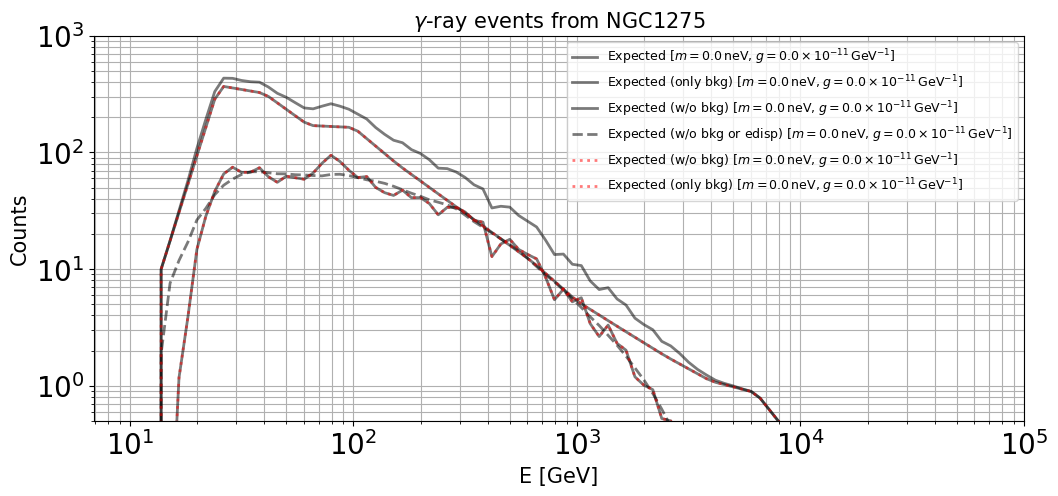

In [30]:
A.configure_obs(nbins = 100,nbins_model = 200,livetime = 0.1, signal=1, edisp=1, bkg=1,
                    irf_file = "$GAMMAPY_DATA/cta-1dc/caldb/data/cta/1dc/bcf/South_z20_50h/irf_file.fits" )
A.compute_case(new_fig=1,plot_obs=0,color="k",linestyle="-",legend=1)
A.configure_obs(signal=0)
A.compute_case(new_fig=0,plot_obs=0,color="k",linestyle="-",legend=1)
A.configure_obs(signal=1,bkg=0)
A.compute_case(new_fig=0,plot_obs=0,color="k",linestyle="-",legend=1)
A.configure_obs(edisp=0)
A.compute_case(new_fig=0,plot_obs=0,color="k",linestyle="--",legend=1)


A.configure_obs(signal=1,edisp=1,bkg=1)
A.configure_model(signal=1,bkg=0) 
A.compute_case(new_fig=0,plot_obs=0,color="r",linestyle=":",legend=1)
A.configure_model(signal=0,bkg=1) 
A.compute_case(new_fig=0,plot_obs=0,color="r",linestyle=":",legend=1)

In [31]:
B.configure_model(bkg=0)
B.with_bkg_model

0

Total flux (counts): 568.9776686033704
Total flux (counts): 568.9776685967557


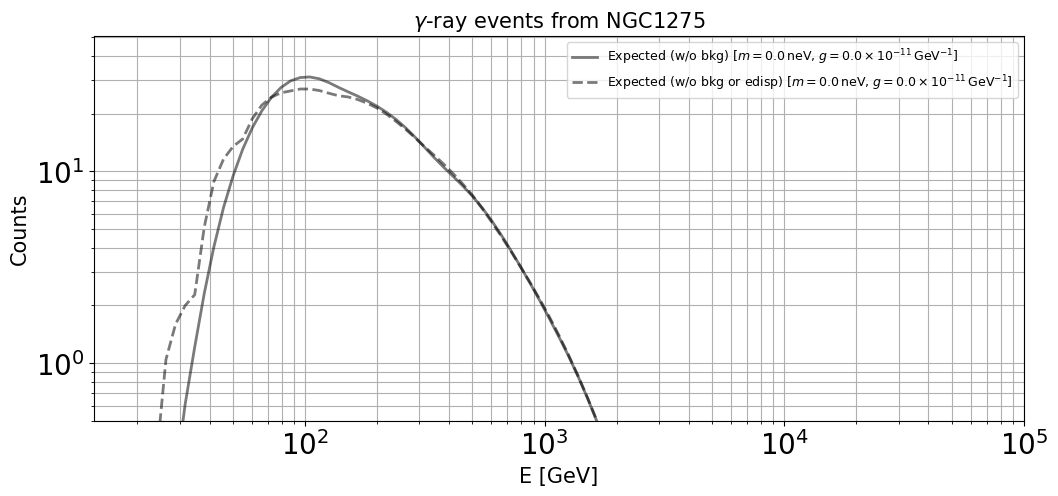

In [32]:
B.configure_plot(xmax=1e5, figsize=(12,5), dnde=0)
B.configure_obs(nbins = 100,nbins_model = 200,livetime = 0.1, signal=1, edisp=1, bkg=0,
                    irf_file = "magicDL3_05059487.fits" )
B.configure_model(bkg=0)
B.compute_case(new_fig=1,plot_obs=0,color="k",linestyle="-",legend=1)
B.configure_obs(edisp=0)
B.compute_case(new_fig=0,plot_obs=0,color="k",linestyle="--",legend=1)

Total flux (counts): 51.83509923789938
Total flux (counts): 56.09684269216307


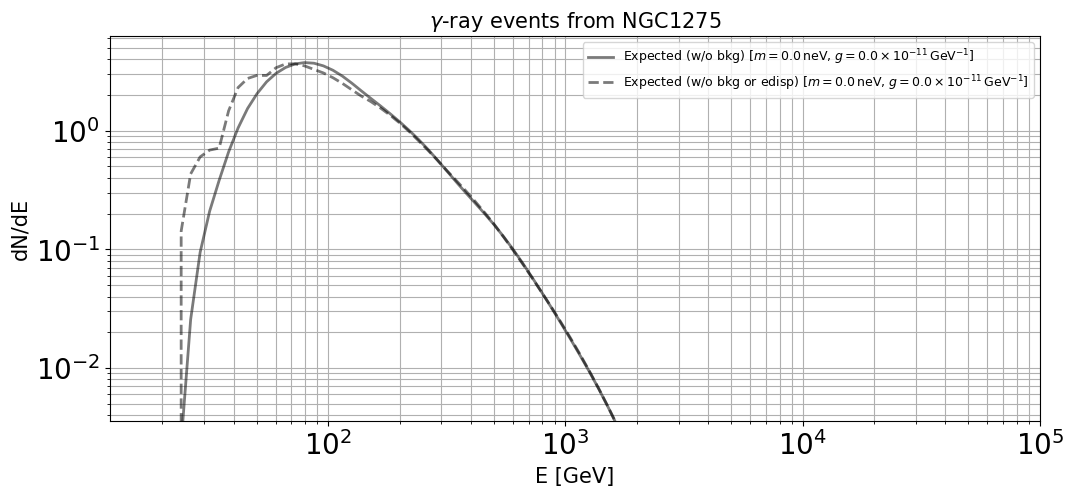

In [33]:
B.configure_plot(xmax=1e5, figsize=(12,5), dnde=1)
B.configure_obs(nbins = 100,nbins_model = 200,livetime = 0.1, signal=1, edisp=1, bkg=0,
                    irf_file = "magicDL3_05059487.fits" )
B.configure_model(bkg=0)
B.compute_case(new_fig=1,plot_obs=0,color="k",linestyle="-",legend=1)
B.configure_obs(edisp=0)
B.compute_case(new_fig=0,plot_obs=0,color="k",linestyle="--",legend=1)

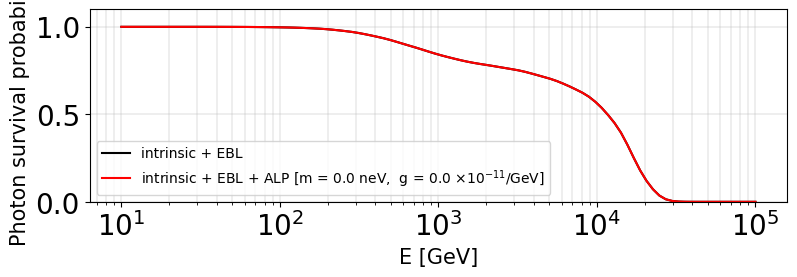

In [34]:
plt.figure(figsize=(9,2.5))
plt.grid(True,which='both',linewidth=0.3)
plt.ylabel('Photon survival probability', size=15)
plt.xlabel('E [GeV]',size=15)
#plt.xlim([1e1,5e3])
#plt.ylim([0.,1.5])
plt.ylim([0.,1.1])
#plt.xlim([A.xmin, A.xmax])
#plt.xlim([min(A.bin_centers[A.counts_obs != 0])*0.5, max(A.bin_centers[A.counts_obs != 0])*1.5])
#plt.ylim([min(A.counts_obs[A.counts_obs != 0])*0.5, max(A.counts_obs[A.counts_obs != 0])*1.5])
plt.xscale("log")

plt.plot(A.enpoints_pgg, A.pgg_EBL, "-",color="k",
         label="intrinsic + EBL")

plt.plot(A.enpoints_pgg, A.pgg,color="r", 
         label=r"intrinsic + EBL + ALP [m = {:.1f} neV,  g = {:.1f} $ \times  10^{{-11 }} / \mathrm{{GeV}} $]".format(A.params[0],A.params[1]))

#plt.plot([5e1,5e1],[0,1.5], c='0.5', linestyle='--', label="Range in paper")
#plt.plot([2.8e4,2.8e4],[0,1.5], c='0.5', linestyle='--' )

plt.legend()

# 